In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = 'browser'

In [3]:
df = pd.read_csv("./Data/SBILIFE.csv")
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,02-01-2024 00:00:00,1439.85,1448.85,1421.95,1439.00,11060
1,03-01-2024 00:00:00,1435.85,1439.65,1415.70,1419.75,13078
2,04-01-2024 00:00:00,1421.50,1435.20,1415.60,1431.45,4869
3,05-01-2024 00:00:00,1431.05,1467.55,1431.05,1453.50,19028
4,08-01-2024 00:00:00,1463.40,1463.40,1416.75,1420.10,25740
...,...,...,...,...,...,...
379,11-07-2025 00:00:00,1819.95,1839.15,1813.10,1834.75,12164
380,14-07-2025 00:00:00,1848.95,1855.85,1832.00,1850.75,25023
381,15-07-2025 00:00:00,1845.35,1851.50,1822.45,1824.80,43547
382,16-07-2025 00:00:00,1830.35,1839.40,1821.65,1828.80,12227


In [5]:
df['Date'] = df['Date'].str.split(' ').str[0]

In [6]:
df

,Date,Open,High,Low,Close,Volume
0,02-01-2024,1439.85,1448.85,1421.95,1439.00,11060
1,03-01-2024,1435.85,1439.65,1415.70,1419.75,13078
2,04-01-2024,1421.50,1435.20,1415.60,1431.45,4869
3,05-01-2024,1431.05,1467.55,1431.05,1453.50,19028
4,08-01-2024,1463.40,1463.40,1416.75,1420.10,25740
...,...,...,...,...,...,...
379,11-07-2025,1819.95,1839.15,1813.10,1834.75,12164
380,14-07-2025,1848.95,1855.85,1832.00,1850.75,25023
381,15-07-2025,1845.35,1851.50,1822.45,1824.80,43547
382,16-07-2025,1830.35,1839.40,1821.65,1828.80,12227


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [8]:
df

,Date,Open,High,Low,Close,Volume
0,2024-01-02,1439.85,1448.85,1421.95,1439.00,11060
1,2024-01-03,1435.85,1439.65,1415.70,1419.75,13078
2,2024-01-04,1421.50,1435.20,1415.60,1431.45,4869
3,2024-01-05,1431.05,1467.55,1431.05,1453.50,19028
4,2024-01-08,1463.40,1463.40,1416.75,1420.10,25740
...,...,...,...,...,...,...
379,2025-07-11,1819.95,1839.15,1813.10,1834.75,12164
380,2025-07-14,1848.95,1855.85,1832.00,1850.75,25023
381,2025-07-15,1845.35,1851.50,1822.45,1824.80,43547
382,2025-07-16,1830.35,1839.40,1821.65,1828.80,12227


In [9]:
df.set_index('Date', inplace=True)

In [10]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,1439.85,1448.85,1421.95,1439.00,11060
2024-01-03,1435.85,1439.65,1415.70,1419.75,13078
2024-01-04,1421.50,1435.20,1415.60,1431.45,4869
2024-01-05,1431.05,1467.55,1431.05,1453.50,19028
2024-01-08,1463.40,1463.40,1416.75,1420.10,25740
...,...,...,...,...,...
2025-07-11,1819.95,1839.15,1813.10,1834.75,12164
2025-07-14,1848.95,1855.85,1832.00,1850.75,25023
2025-07-15,1845.35,1851.50,1822.45,1824.80,43547


In [11]:
def calculate_dema(data, window):
    ema = data.ewm(span=window, adjust=False).mean()
    ema_of_ema = ema.ewm(span=window, adjust=False).mean()
    dema = 2 * ema - ema_of_ema
    return dema

In [14]:
df['DEMA_20'] = calculate_dema(df['Open'], 20)
df['DEMA_30'] = calculate_dema(df['Open'], 30)

NameError: name 'dema_20' is not defined

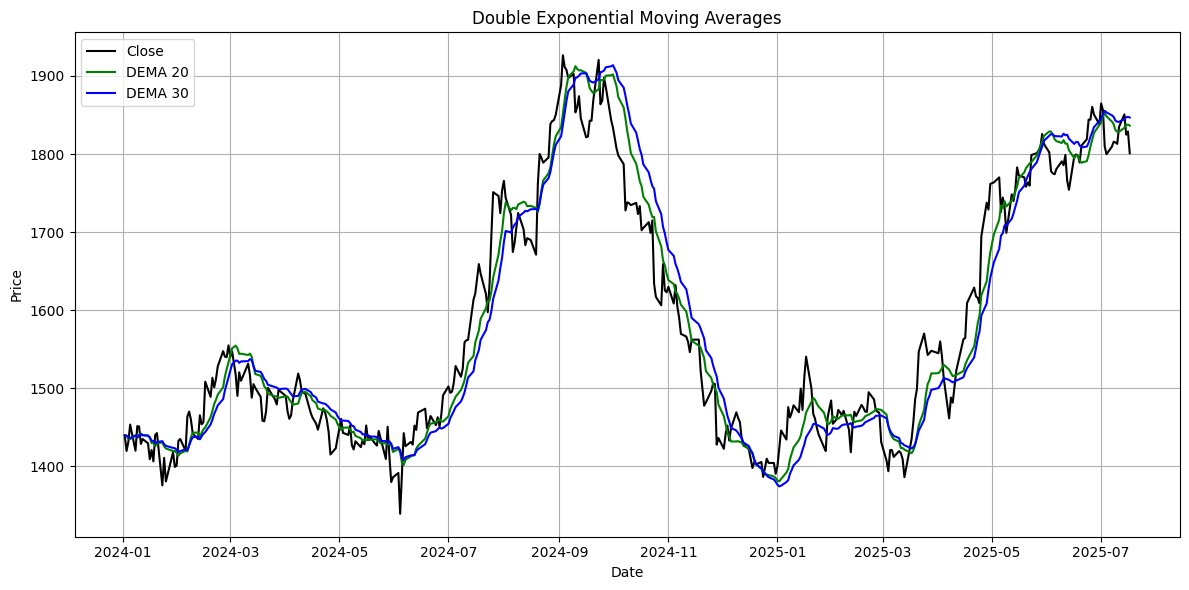

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close', color='black', linewidth=1.5)
plt.plot(df['DEMA_20'], label='DEMA 20', color='green')
plt.plot(df['DEMA_30'], label='DEMA 30', color='blue')

plt.title('Double Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df['Signal'] = 'Hold'  # Default

df.loc[(df['DEMA_20'] < df['DEMA_30']) & (df['DEMA_20'].shift(1) >= df['DEMA_30'].shift(1)), 'Signal'] = 'Sell'

signals_df = df[df['Signal'] != 'Hold'][['Close', 'DEMA_20', 'DEMA_30', 'Signal']]

print(signals_df)

              Close      DEMA_20      DEMA_30 Signal
Date                                                
2024-01-03  1419.75  1439.124376  1439.350520   Sell
2024-01-09  1451.65  1436.468992  1437.256859   Sell
2024-01-16  1409.25  1436.551522  1437.381205   Sell
2024-03-14  1505.30  1527.993792  1528.442631   Sell
2024-08-20  1761.80  1725.815754  1727.764320   Sell
2024-09-17  1822.30  1894.670901  1899.177659   Sell
2025-03-04  1393.80  1451.746033  1451.798299   Sell
2025-06-04  1775.15  1824.691122  1825.097920   Sell


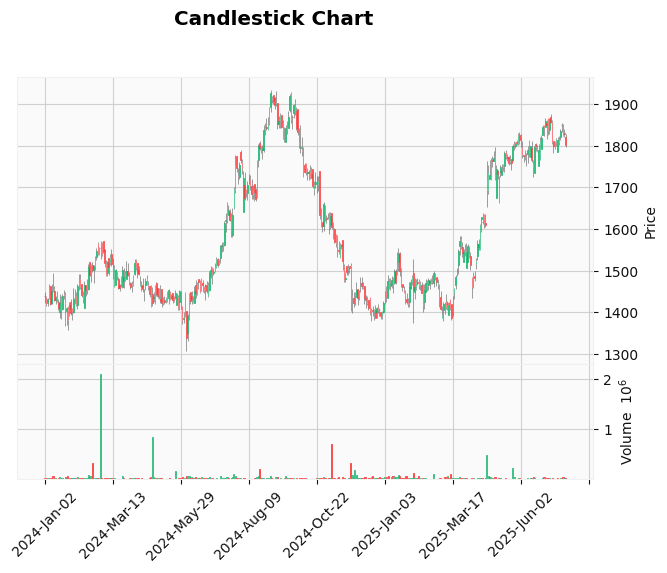

In [17]:
mpf.plot(df, type='candle', volume=True, style='yahoo', title='Candlestick Chart')

In [18]:
fig = go.Figure(data=[go.Candlestick(
    x=df.index,          # Use index for x-axis (Date)
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False  # Hide default range slider for clarity
)

fig.show()

In [19]:
import plotly.graph_objects as go

# Assume df has Date as index, and columns: Open, High, Low, Close, DEMA_20, DEMA_30, Signal

fig = go.Figure()

# Add candlestick trace
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Add DEMA_20 line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['DEMA_20'],
    mode='lines',
    line=dict(color='blue', width=1),
    name='DEMA 20'
))

# Add DEMA_30 line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['DEMA_30'],
    mode='lines',
    line=dict(color='orange', width=1),
    name='DEMA 30'
))

# Plot Buy signals (triangle-up green markers)
buy_signals = df[df['Signal'] == 'Buy']
fig.add_trace(go.Scatter(
    x=buy_signals.index,
    y=buy_signals['Low'] * 0.995,  # Slightly below low for visibility
    mode='markers',
    marker=dict(symbol='triangle-up', color='green', size=12),
    name='Buy Signal'
))

# Plot Sell signals (triangle-down red markers)
sell_signals = df[df['Signal'] == 'Sell']
fig.add_trace(go.Scatter(
    x=sell_signals.index,
    y=sell_signals['High'] * 1.005,  # Slightly above high for visibility
    mode='markers',
    marker=dict(symbol='triangle-down', color='red', size=12),
    name='Sell Signal'
))

fig.update_layout(
    title='Candlestick Chart with DEMA and Buy/Sell Signals',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    legend=dict(x=0, y=1)
)

fig.show()
